# **Projeto desafio 2 - administração de condomínios** 🏡:

---

A administração de condomínios é uma tarefa que requer muita atenção e organização. Entre as diversas responsabilidades da gestão está o recebimento dos aluguéis dos locatários. Para garantir uma boa saúde financeira do empreendimento, é fundamental que esses pagamentos sejam feitos de forma regular e pontual. No entanto, sabemos que nem sempre isso acontece.

Pensando nisso, proponho um desafio de tratamento de dados com o objetivo de analisar o atraso no pagamento de aluguéis no condomínio de alguns moradores. Disponibilizo a base de dados [dados_locacao_imoveis.json](https://raw.githubusercontent.com/Marina-Falcao-DEV/Datasets-aninhados-JSON-Alura-transformar-e-manipular-dados-Google-Colab-Python/refs/heads/main/dados_locacao_imoveis.json), que contém informações sobre o apartamento dos locatários, o dia acordado para o pagamento do aluguel, o dia da efetivação do pagamento de aluguel e o valor do aluguel.







# **1. Transformação e manipulação dos dados:**

In [106]:
# Importação das bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [107]:
# Importação do dataset:
URL = "https://raw.githubusercontent.com/Marina-Falcao-DEV/Datasets-aninhados-JSON-Alura-transformar-e-manipular-dados-Google-Colab-Python/refs/heads/main/dados_locacao_imoveis.json"
df_condominios = pd.read_json(URL)


In [108]:
# Visualização do dataset:
df_condominios

,dados_locacao
0,"{'apartamento': 'A101 (blocoAP)', 'datas_combi..."
1,"{'apartamento': 'A102 (blocoAP)', 'datas_combi..."
2,"{'apartamento': 'B201 (blocoAP)', 'datas_combi..."
3,"{'apartamento': 'B202 (blocoAP)', 'datas_combi..."
4,"{'apartamento': 'C301 (blocoAP)', 'datas_combi..."
5,"{'apartamento': 'C302 (blocoAP)', 'datas_combi..."
6,"{'apartamento': 'D401 (blocoAP)', 'datas_combi..."
7,"{'apartamento': 'D402 (blocoAP)', 'datas_combi..."
8,"{'apartamento': 'E501 (blocoAP)', 'datas_combi..."
9,"{'apartamento': 'E502 (blocoAP)', 'datas_combi..."


In [109]:
# Normalização do dataset:
df_condominios = pd.json_normalize(df_condominios["dados_locacao"])

In [110]:
# Visualização do dataset normalizado:
df_condominios

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),"[01/06/2022, 01/07/2022]","[05/06/2022, 03/07/2022]","[$ 1000,0 reais, $ 2500,0 reais]"
1,A102 (blocoAP),"[02/06/2022, 02/07/2022]","[02/06/2022, 06/07/2022]","[$ 1100,0 reais, $ 2600,0 reais]"
2,B201 (blocoAP),"[03/06/2022, 03/07/2022]","[07/06/2022, 03/07/2022]","[$ 1200,0 reais, $ 2700,0 reais]"
3,B202 (blocoAP),"[04/06/2022, 04/07/2022]","[07/06/2022, 05/07/2022]","[$ 1300,0 reais, $ 2800,0 reais]"
4,C301 (blocoAP),"[05/06/2022, 05/07/2022]","[10/06/2022, 09/07/2022]","[$ 1400,0 reais, $ 2900,0 reais]"
5,C302 (blocoAP),"[06/06/2022, 06/07/2022]","[08/06/2022, 12/07/2022]","[$ 1500,0 reais, $ 1200,0 reais]"
6,D401 (blocoAP),"[07/06/2022, 07/07/2022]","[07/06/2022, 09/07/2022]","[$ 1600,0 reais, $ 1300,0 reais]"
7,D402 (blocoAP),"[08/06/2022, 08/07/2022]","[10/06/2022, 14/07/2022]","[$ 1700,0 reais, $ 1400,0 reais]"
8,E501 (blocoAP),"[09/06/2022, 09/07/2022]","[10/06/2022, 09/07/2022]","[$ 1800,0 reais, $ 1500,0 reais]"
9,E502 (blocoAP),"[10/06/2022, 10/07/2022]","[16/06/2022, 12/07/2022]","[$ 1900,0 reais, $ 1600,0 reais]"


In [111]:
# Uso do método .explode() para desfazer os aninhamentos do dataframe:
df_condominios = df_condominios.explode(["datas_combinadas_pagamento","datas_de_pagamento","valor_aluguel"])
df_condominios

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
0,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
1,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
1,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
2,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
2,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
3,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
3,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
4,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
4,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [112]:
# Verificação dos tipos de dados do dataframe:
df_condominios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   apartamento                 30 non-null     object
 1   datas_combinadas_pagamento  30 non-null     object
 2   datas_de_pagamento          30 non-null     object
 3   valor_aluguel               30 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [113]:
# Transformação dos tipos de dados da Series df_condomínios["Valor_aluguel"] para valores numéricos:
df_condominios["valor_aluguel"] = df_condominios["valor_aluguel"].apply(lambda x: x.replace("$", "").replace(",",".").replace("reais","").strip()) # Remoção de caracteres não numéricos e de espaços
df_condominios["valor_aluguel"] = df_condominios["valor_aluguel"].astype(np.float64) # Tranformação dos dados em valores numéricos do tipo float
df_condominios


,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,1000.0
0,A101 (blocoAP),01/07/2022,03/07/2022,2500.0
1,A102 (blocoAP),02/06/2022,02/06/2022,1100.0
1,A102 (blocoAP),02/07/2022,06/07/2022,2600.0
2,B201 (blocoAP),03/06/2022,07/06/2022,1200.0
2,B201 (blocoAP),03/07/2022,03/07/2022,2700.0
3,B202 (blocoAP),04/06/2022,07/06/2022,1300.0
3,B202 (blocoAP),04/07/2022,05/07/2022,2800.0
4,C301 (blocoAP),05/06/2022,10/06/2022,1400.0
4,C301 (blocoAP),05/07/2022,09/07/2022,2900.0


In [114]:
# Verificação dos tipos de dados ajustados:
df_condominios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartamento                 30 non-null     object 
 1   datas_combinadas_pagamento  30 non-null     object 
 2   datas_de_pagamento          30 non-null     object 
 3   valor_aluguel               30 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [115]:
# Transformação dos tipos de dados da Series df_vendas["Valor da compra"] para valores textuais:
df_condominios["apartamento"] = df_condominios["apartamento"].str.replace("\(blocoAP\)", "", regex = True) # Remoção do (blocoAP)
df_condominios # Visualização

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1791682853.py:2: SyntaxWarning: invalid escape sequence '\('
  df_condominios["apartamento"] = df_condominios["apartamento"].str.replace("\(blocoAP\)", "", regex = True) # Remoção do (blocoAP)


,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,01/06/2022,05/06/2022,1000.0
0,A101,01/07/2022,03/07/2022,2500.0
1,A102,02/06/2022,02/06/2022,1100.0
1,A102,02/07/2022,06/07/2022,2600.0
2,B201,03/06/2022,07/06/2022,1200.0
2,B201,03/07/2022,03/07/2022,2700.0
3,B202,04/06/2022,07/06/2022,1300.0
3,B202,04/07/2022,05/07/2022,2800.0
4,C301,05/06/2022,10/06/2022,1400.0
4,C301,05/07/2022,09/07/2022,2900.0


In [116]:
# Transformação das Series de datas para o tipo datetime:
for series in ["datas_combinadas_pagamento",  "datas_de_pagamento"]: # Acesso a cada uma das colunas
  df_condominios[series] = pd.to_datetime(df_condominios[series], format = "%d/%m/%Y") # Atrubuição do datetime a cada uma das colunas

df_condominios # Visualização do dataframe

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,2022-06-01,2022-06-05,1000.0
0,A101,2022-07-01,2022-07-03,2500.0
1,A102,2022-06-02,2022-06-02,1100.0
1,A102,2022-07-02,2022-07-06,2600.0
2,B201,2022-06-03,2022-06-07,1200.0
2,B201,2022-07-03,2022-07-03,2700.0
3,B202,2022-06-04,2022-06-07,1300.0
3,B202,2022-07-04,2022-07-05,2800.0
4,C301,2022-06-05,2022-06-10,1400.0
4,C301,2022-07-05,2022-07-09,2900.0


In [117]:
# Verificação dos tipos de dados de cada Series do dataframe:
df_condominios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   apartamento                 30 non-null     object        
 1   datas_combinadas_pagamento  30 non-null     datetime64[ns]
 2   datas_de_pagamento          30 non-null     datetime64[ns]
 3   valor_aluguel               30 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.2+ KB


In [118]:
# Criação de uma Series no dataframe com a quantidade de dias de atraso do pagamento do aluguel:
df_condominios["dias_atraso"] = df_condominios["datas_de_pagamento"] - df_condominios["datas_combinadas_pagamento"]
df_condominios

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,dias_atraso
0,A101,2022-06-01,2022-06-05,1000.0,4 days
0,A101,2022-07-01,2022-07-03,2500.0,2 days
1,A102,2022-06-02,2022-06-02,1100.0,0 days
1,A102,2022-07-02,2022-07-06,2600.0,4 days
2,B201,2022-06-03,2022-06-07,1200.0,4 days
2,B201,2022-07-03,2022-07-03,2700.0,0 days
3,B202,2022-06-04,2022-06-07,1300.0,3 days
3,B202,2022-07-04,2022-07-05,2800.0,1 days
4,C301,2022-06-05,2022-06-10,1400.0,5 days
4,C301,2022-07-05,2022-07-09,2900.0,4 days


In [119]:
# Criação de uma nova Series no datafarme contendo a quantidade de dias de atraso do aluguel:
df_condominios["dias_atraso"] = df_condominios["datas_de_pagamento"] - df_condominios["datas_combinadas_pagamento"] # Cálculo dos dias de atraso do aluguel e atribuição a uma variável
df_condominios["dias_atraso"] = df_condominios["dias_atraso"].dt.days # O atributo dt.days irá extrair apenas a componente de dias da Series de dados do tipo timedelta
df_condominios

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,dias_atraso
0,A101,2022-06-01,2022-06-05,1000.0,4
0,A101,2022-07-01,2022-07-03,2500.0,2
1,A102,2022-06-02,2022-06-02,1100.0,0
1,A102,2022-07-02,2022-07-06,2600.0,4
2,B201,2022-06-03,2022-06-07,1200.0,4
2,B201,2022-07-03,2022-07-03,2700.0,0
3,B202,2022-06-04,2022-06-07,1300.0,3
3,B202,2022-07-04,2022-07-05,2800.0,1
4,C301,2022-06-05,2022-06-10,1400.0,5
4,C301,2022-07-05,2022-07-09,2900.0,4


In [120]:
# Verificação dos tipos de dados do dataframe:
df_condominios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   apartamento                 30 non-null     object        
 1   datas_combinadas_pagamento  30 non-null     datetime64[ns]
 2   datas_de_pagamento          30 non-null     datetime64[ns]
 3   valor_aluguel               30 non-null     float64       
 4   dias_atraso                 30 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


# 2. Análise dos resultados:

## 2.1 Quantidade de apartamentos em atraso com o pagamento do aluguel:


In [121]:
# Cálculo do número de apartamentos únicos que têm pelo menos um pagamento de aluguel em atraso:
quant_apartamentos_com_atraso = df_condominios[df_condominios["dias_atraso"] > 0]["apartamento"].nunique()
print("="*80)
print(f">> Número de apartamentos com pelo menos um pagamento em atraso: {quant_apartamentos_com_atraso}")
print("="*80)

>> Número de apartamentos com pelo menos um pagamento em atraso: 15


## 2.2 Média de dias de atraso de pagamento de aluguel por apartamentos:

In [131]:
# Obtenção da média de dias de atraso para o pagamento do aluguel por apartamento:
media_dias_atraso_por_apartamento = df_condominios.groupby("apartamento")["dias_atraso"].mean()
print("="*80)
print(f">> Média de dias de atraso por apartamento:")
print("="*80)
media_dias_atraso_por_apartamento


>> Média de dias de atraso por apartamento:


,dias_atraso
apartamento,
A101,3.0
A102,2.0
B201,2.0
B202,2.0
C301,4.5
C302,4.0
D401,1.0
D402,4.0
E501,0.5


## 2.3 Máximo de dias de atraso com o pagamento do aluguel por apartamento:

In [138]:
# Obtenção do máximo de dias de atraso para o pagamento do aluguel por apartamento:
maximo_dias_atraso_por_apartamento = df_condominios.groupby("apartamento")["dias_atraso"].max()
print("="*80)
print(f">> Máximo de dias de atraso por apartamento:")
print("="*80)
maximo_dias_atraso_por_apartamento


>> Máximo de dias de atraso por apartamento:


,dias_atraso
apartamento,
A101,4
A102,4
B201,4
B202,3
C301,5
C302,6
D401,2
D402,6
E501,1


## 2.4 Relação entre o valor do aluguel e o os dias de atraso com o pagamento do aluguel:

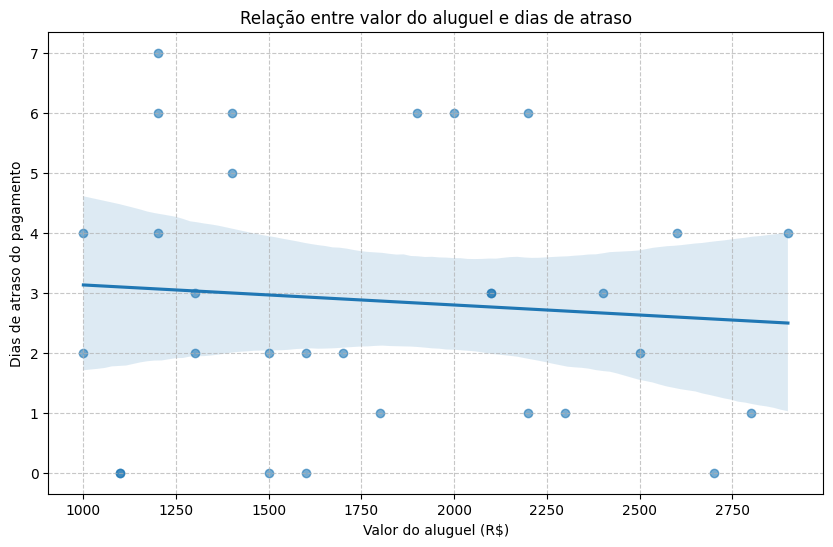

In [134]:
# Verificação se o valor do aluguel tem relação com os dias de atraso do paragamento do aluguel:
plt.figure(figsize=(10, 6))
sns.regplot(x="valor_aluguel", y="dias_atraso", data=df_condominios, scatter_kws={"alpha":0.6})
plt.title("Relação entre valor do aluguel e dias de atraso")
plt.xlabel('Valor do aluguel (R$)')
plt.ylabel('Dias de atraso do pagamento')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# FIM